# Importing Libraries

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

# Test set Image Processing

In [25]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'new_valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 1943 files belonging to 4 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']


# Loading Model

In [26]:
cnn = tf.keras.models.load_model("trained_plant_disease_model_grayscale.keras",compile=False)

#Visualising and Performing Prediction on Single image

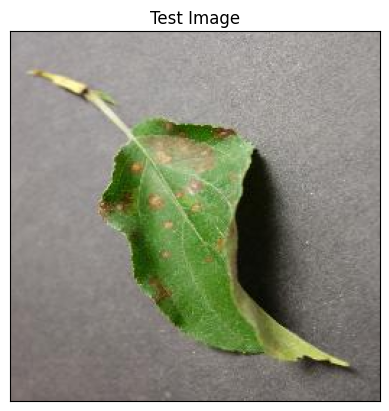

In [ ]:
#Test Image Visualization
import cv2
image_path = 'test/AppleCedarRust3.JPG'
# Reading an image 
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [28]:
image = tf.keras.preprocessing.image.load_img(image_path, color_mode='grayscale', target_size=(128, 128))
# Convert to array
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = input_arr / 255.0
input_arr = np.expand_dims(input_arr, axis=0) 
predictions = cnn.predict(input_arr)
print("Prediction:", predictions)

1/1 [==============================] - 1s 785ms/step
Prediction: [[0.17837954 0.43808502 0.16824752 0.21528792]]


In [29]:
result_index = np.argmax(predictions) 
print(result_index)

1


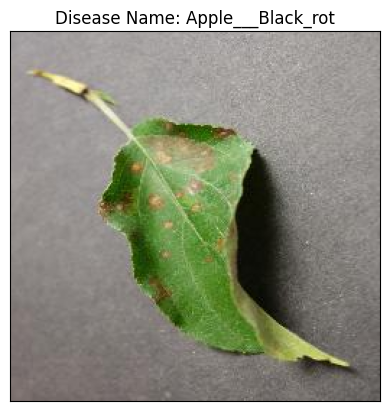

In [30]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()